In [1]:
import numpy as np
from hf_solver import hf_solver
import matplotlib.pyplot as plt

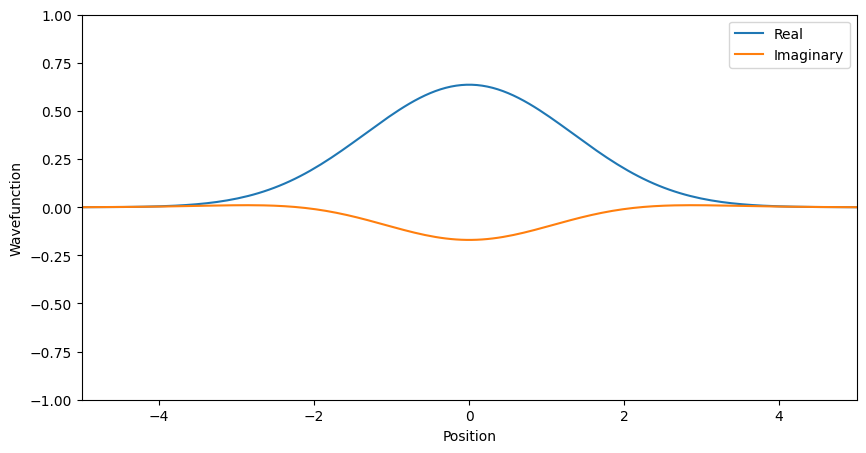

Time taken: 28.94564986228943 sec


<Figure size 1000x500 with 0 Axes>

In [7]:
# This premptively generates the domain so the initial state can be set. Ideally this will all be done through methods, still working on fixing the class up.
#domain = np.linspace(-5, 5, 150)

# Initalizes the object
sim = hf_solver(1, 1)

domain = sim.set_domain()

# Sets the potential (currently hardcoded to quantum harmonic oscillator)
sim.set_potential(150, -5, 5, 1)

# Sets the initial state, in this case a guassian wave packet centered at zero. This will eventually all be done strictly through methods.
sim.set_initial_state(0,1/(2)**(1/2),0)

# Sets the hamiltonian matrix
sim.construct_hamiltonian()

# Sets time evolution operator
sim.time_evolution(4, 200, 1)

# Runs the animation
sim.run_animation()


Length of self.t: 200
Length of self.total_energies: 200


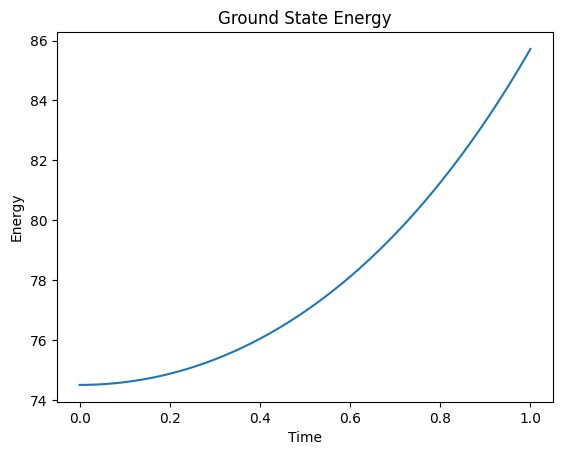

In [8]:
# Energy can be graphed after the animation or training simulation
sim.graph_energy()


In [4]:
# Basic example of the run_simulation method, this particular instance will record data for the first 100 timesteps. Outputs are the final state, all saved states, all saved energies, and the total time taken.
f_state, a_states, energies, total_time = sim.run_simulation(100)
print(total_time, 'sec', a_states)

0.14981603622436523 sec [[[2.79918439e-06+0.00000000e+00j 3.90651786e-06+0.00000000e+00j
   5.42740122e-06+0.00000000e+00j ... 5.42740122e-06+0.00000000e+00j
   3.90651786e-06+0.00000000e+00j 2.79918439e-06+0.00000000e+00j]
  [2.79918439e-06+0.00000000e+00j 3.90651786e-06+0.00000000e+00j
   5.42740122e-06+0.00000000e+00j ... 5.42740122e-06+0.00000000e+00j
   3.90651786e-06+0.00000000e+00j 2.79918439e-06+0.00000000e+00j]
  [2.79918439e-06+0.00000000e+00j 3.90651786e-06+0.00000000e+00j
   5.42740122e-06+0.00000000e+00j ... 5.42740122e-06+0.00000000e+00j
   3.90651786e-06+0.00000000e+00j 2.79918439e-06+0.00000000e+00j]
  ...
  [2.79918439e-06+0.00000000e+00j 3.90651786e-06+0.00000000e+00j
   5.42740122e-06+0.00000000e+00j ... 5.42740122e-06+0.00000000e+00j
   3.90651786e-06+0.00000000e+00j 2.79918439e-06+0.00000000e+00j]
  [2.79918439e-06+0.00000000e+00j 3.90651786e-06+0.00000000e+00j
   5.42740122e-06+0.00000000e+00j ... 5.42740122e-06+0.00000000e+00j
   3.90651786e-06+0.00000000e+00j 2.

Length of self.t: 100
Length of self.total_energies: 100


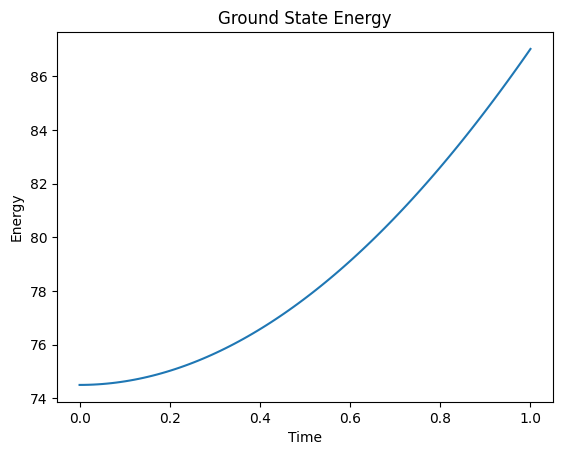

In [5]:
sim.graph_energy()

In [6]:
sim.create_conv_autoencoder()
sim.train_conv_autoencoder(epochs=2000, batch_size=10)
reconstructed_states = sim.generate_reconstructed_states()

AttributeError: 'hf_solver' object has no attribute 'create_conv_autoencoder'

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(sim.domain, sim.initial_state, label='Original State')
plt.plot(sim.domain, reconstructed_states[0], label='Reconstructed State')
plt.legend()
plt.show()